In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import time
from sklearn.model_selection import train_test_split 

sns.set(style="darkgrid")

In [2]:
data = pd.read_csv('data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [3]:
y = data.diagnosis #y represents the labels

listofcolumnsnotused = ['Unnamed: 32','id','diagnosis'] 
xwithoutnormalisation = data.drop(listofcolumnsnotused, axis = 1) #x without normalsation

In [6]:
#normalisation

x = (xwithoutnormalisation - np.min(xwithoutnormalisation)) \
    /(np.max(xwithoutnormalisation) - np.min(xwithoutnormalisation)).values

x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
listmean = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', \
            'smoothness_mean', 'compactness_mean','concavity_mean','concave points_mean', \
            'symmetry_mean','fractal_dimension_mean']
listse = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
          'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', \
          'fractal_dimension_se']
listworst = ['radius_worst', 'texture_worst','perimeter_worst', 'area_worst', 'smoothness_worst', 
             'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst',
             'fractal_dimension_worst']

#separating variables by 3 groups: mean, se, worst

meancolumns = x.drop(listse, axis = 1).drop(listworst, axis = 1) 
secolumns = x.drop(listmean, axis = 1).drop(listworst, axis = 1) 
worstcolumns = x.drop(listse, axis=1).drop(listmean, axis =1)

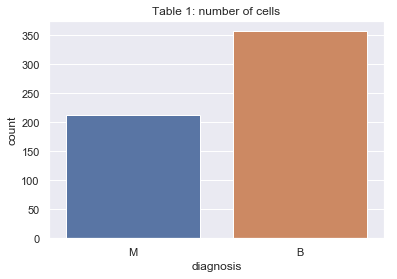

In [8]:
ax = sns.countplot(y).set_title("Table 1: number of cells")

In [9]:
B, M = y.value_counts() 

print("Benign cells: ", B) 
print("Malignant cells: ", M)

('Benign cells: ', 357)
('Malignant cells: ', 212)


Text(0.5,1,'Table 2: mean values')

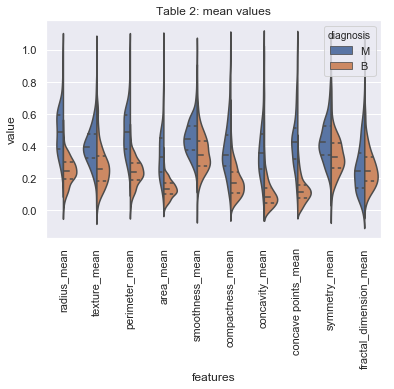

In [11]:
#violin plots for the 3 groups

data_violin = y
data = pd.concat([y, x.iloc[:,0:10]], axis = 1)
data = pd.melt(data, id_vars = "diagnosis", var_name="features", value_name="value")

plt.figure()
plt.xticks(rotation=90)
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,
               split=True, inner="quart", rotation =90).set_title("Table 2: mean values")

Text(0.5,1,'Table 3: se values')

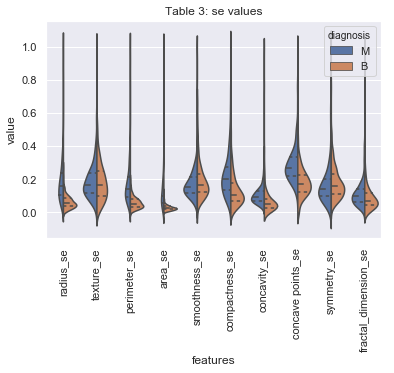

In [118]:
data_violin = y
data = pd.concat([y, x.iloc[:,10:20]], axis = 1)
data = pd.melt(data, id_vars = "diagnosis", var_name="features", value_name="value")

plt.figure()
plt.xticks(rotation=90)
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, 
               inner="quart", rotation =90).set_title("Table 3: se values")

Text(0.5,1,'Table 4: worst values')

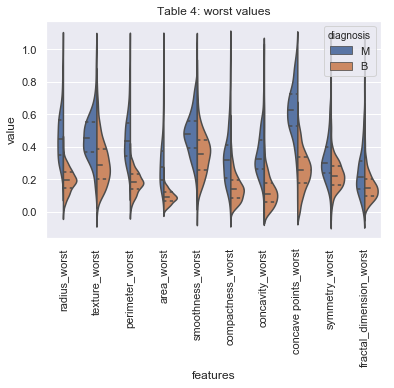

In [12]:
data_violin = y
data = pd.concat([y, x.iloc[:,20:31]], axis = 1)
data = pd.melt(data, id_vars = "diagnosis", var_name="features", value_name="value")

plt.figure()
plt.xticks(rotation=90)
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,
               split=True, inner="quart", rotation =90).set_title("Table 4: worst values")

Text(0.5,1,'Table 5: mean values')

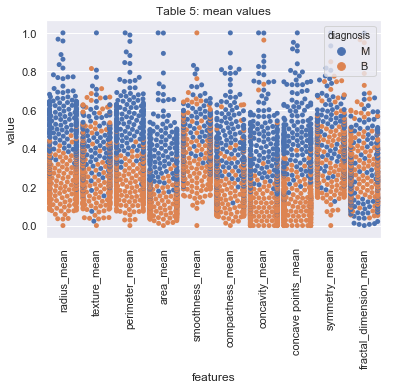

In [13]:
datay=y
data = pd.concat([y,x.iloc[:,0:10]],axis=1) 
data = pd.melt(data,id_vars="diagnosis",var_name="features",value_name='value') 

plt.xticks(rotation=90)
sns.swarmplot(x="features", y="value", hue="diagnosis", 
              data=data).set_title("Table 5: mean values")

Text(0.5,1,'Table 6: se values')

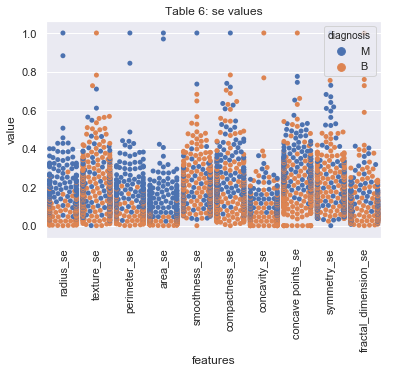

In [14]:
data = pd.concat([y,x.iloc[:,10:20]],axis=1) 
data = pd.melt(data,id_vars="diagnosis", var_name="features",value_name='value') 

plt.xticks(rotation=90)
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data).set_title("Table 6: se values")


Text(0.5,1,'Table 7: worst values')

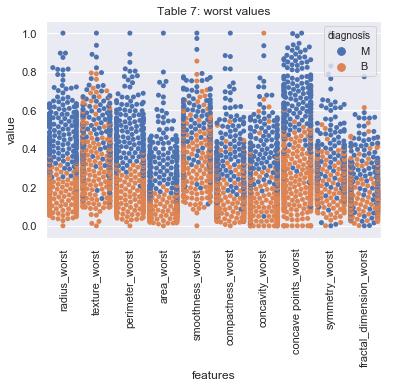

In [15]:
data = pd.concat([y,x.iloc[:,20:31]],axis=1) 
data = pd.melt(data,id_vars="diagnosis", var_name="features",value_name='value') 

plt.xticks(rotation=90)
sns.swarmplot(x="features", y="value", hue="diagnosis", 
              data=data).set_title("Table 7: worst values")

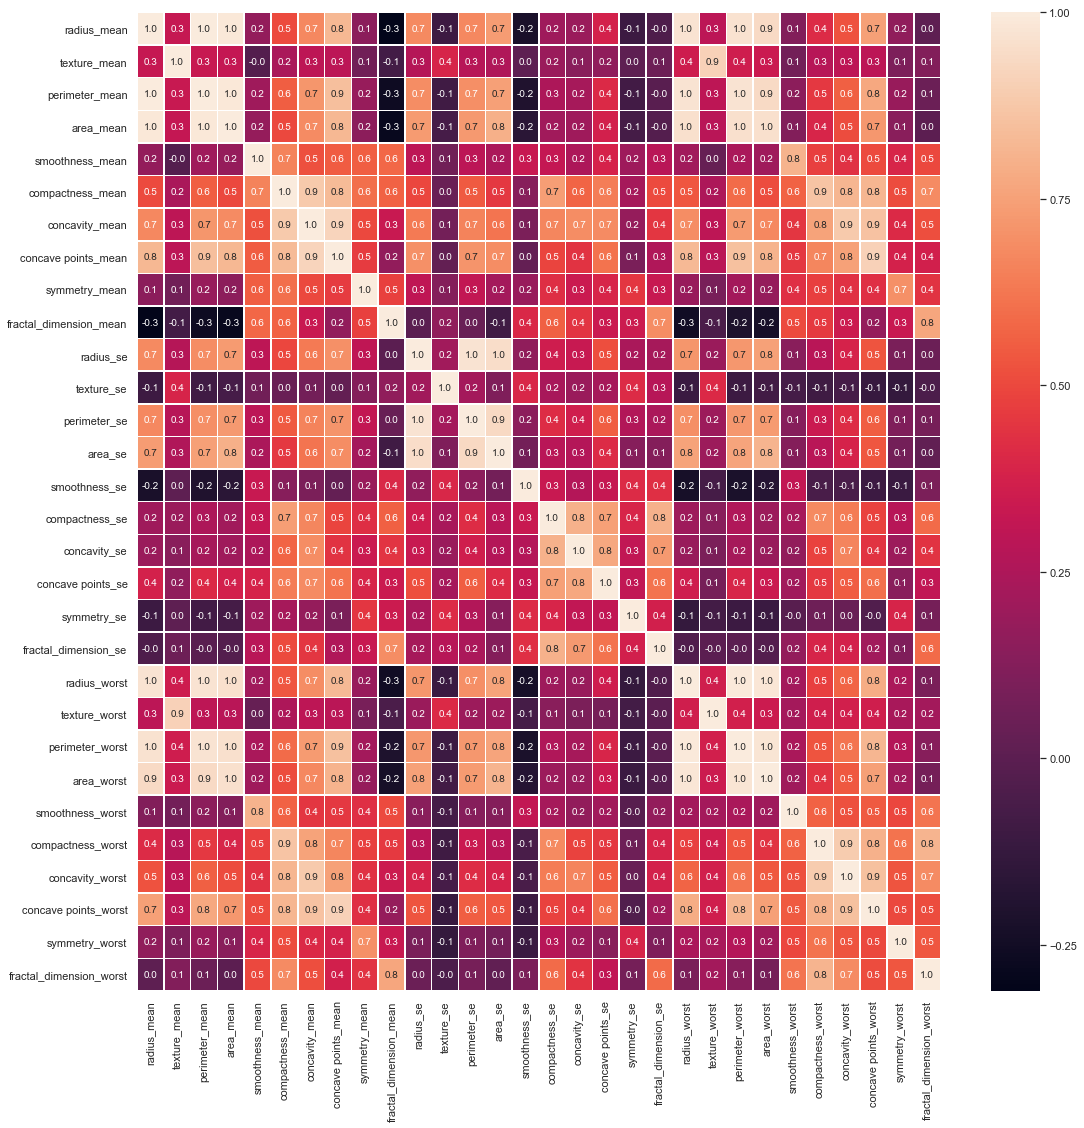

In [16]:
#correlation matrix for all the features

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Text(0.5,1,'Table 8: se values')

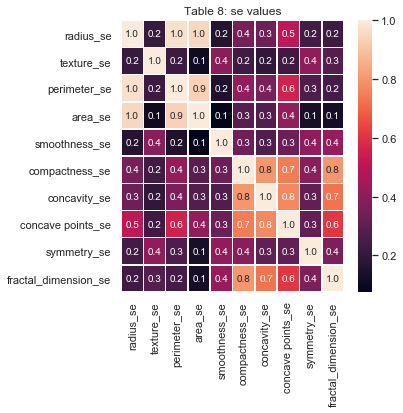

In [17]:
#correlation matrix SE features

f,ax = plt.subplots(figsize=(5, 5)) 
sns.heatmap(secolumns.corr(), annot=True, linewidths=.5, fmt= '.1f',
            ax=ax).set_title("Table 8: se values")


Text(0.5,1,'Table 9: mean values')

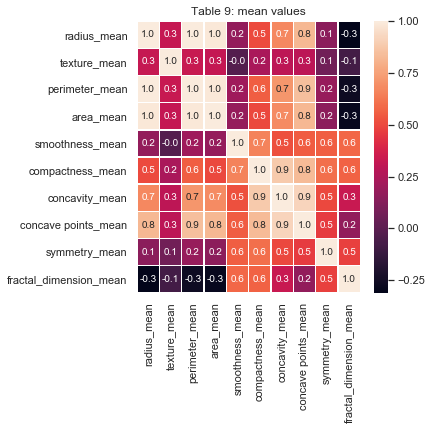

In [18]:
#correlation matrix MEAN features

f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(meancolumns.corr(), annot=True, linewidths=.5, fmt= '.1f',
            ax=ax).set_title("Table 9: mean values")

Text(0.5,1,'Table 10: worst values')

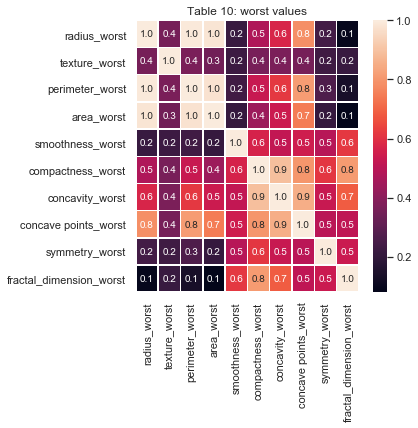

In [19]:
#correlation matrix WORST features

f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(worstcolumns.corr(), annot=True, linewidths=.5, fmt= '.1f',
            ax=ax).set_title("Table 10: worst values")

In [20]:
listtodrop = ['perimeter_mean', 'perimeter_se', 'perimeter_worst', 'area_mean',
              'perimeter_mean', 'perimeter_worst', 'concavity_mean', 'concave points_mean']

xml = x.drop(listtodrop, axis = 1)

In [21]:
xml.describe()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,smoothness_se,...,fractal_dimension_se,radius_worst,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.394785,0.260601,0.379605,0.270379,0.106345,0.189324,0.062636,0.181119,...,0.100193,0.296663,0.363998,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.166787,0.145453,0.126967,0.161992,0.138456,0.148702,0.100421,0.121917,0.084967,0.102067,...,0.091417,0.171940,0.163813,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.304595,0.139685,0.282323,0.163016,0.043781,0.104690,0.020635,0.117483,...,0.046750,0.180719,0.241471,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.302381,0.308759,0.390358,0.224679,0.369697,0.243892,0.077023,0.165267,0.033112,0.158650,...,0.079191,0.250445,0.356876,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,0.416442,0.408860,0.475490,0.340531,0.453030,0.340354,0.133044,0.246155,0.071700,0.218683,...,0.126556,0.386339,0.471748,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xml, y, random_state=0)

In [23]:
#1 SVC

from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from sklearn.svm import SVC

# Create the model Support Vector Machine 
model_svm= SVC(kernel='linear', C = 1.0) 
model_svm.fit(X=X_train,y=y_train) 
predicion_svm = model_svm.predict(X_test)

In [24]:
results_svm=metrics.classification_report(y_true=y_test, y_pred=predicion_svm)
print(results_svm)

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        90
           M       0.98      0.91      0.94        53

   micro avg       0.96      0.96      0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



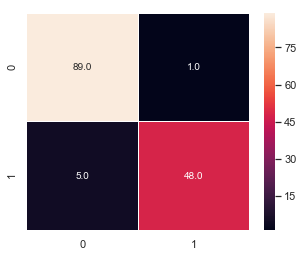

In [25]:
cm_svm=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_svm)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_svm, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [26]:
#2 KNN

from sklearn.neighbors import KNeighborsClassifier 

# Create the model
model_knn= KNeighborsClassifier(n_neighbors=10) 
model_knn.fit(X=X_train,y=y_train)
predicion_knn = model_knn.predict(X_test)

# Clasification report 
results_knn=metrics.classification_report(y_true=y_test, y_pred=predicion_knn)
print(results_knn)

              precision    recall  f1-score   support

           B       0.95      1.00      0.97        90
           M       1.00      0.91      0.95        53

   micro avg       0.97      0.97      0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



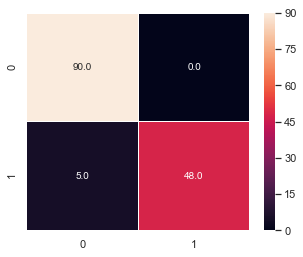

In [27]:
# Confusion matrix
cm_knn= metrics.confusion_matrix(y_true=y_test, y_pred=predicion_knn)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_knn, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [31]:
# 3. Gaussian NB

from sklearn.naive_bayes import GaussianNB 

model_NB= GaussianNB() 
model_NB.fit(X=X_train,y=y_train) 

predicion_NB = model_NB.predict(X_test)

In [32]:
#Clasification report 
results_NB=metrics.classification_report(y_true=y_test, y_pred=predicion_NB)
print(results_NB)

              precision    recall  f1-score   support

           B       0.93      0.91      0.92        90
           M       0.85      0.89      0.87        53

   micro avg       0.90      0.90      0.90       143
   macro avg       0.89      0.90      0.90       143
weighted avg       0.90      0.90      0.90       143



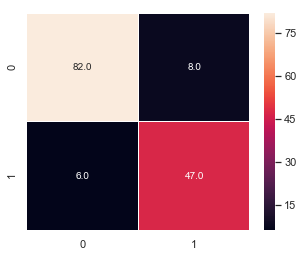

In [33]:
#Confusion Matrix 
cm_NB=metrics.confusion_matrix(y_true=y_test, y_pred=predicion_NB)
f,ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cm_NB, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [34]:
print('Accuracy of SVM classifier on training set: {:.2f}' .format(model_svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}' .format(model_svm.score(X_test, y_test)))
print('Accuracy of K-NN classifier on training set: {:.2f}' .format(model_knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}' .format(model_knn.score(X_test, y_test)))
print('Accuracy of NaiveBayes classifier on training set: {:.2f}' .format(model_NB.score(X_train, y_train)))
print('Accuracy of NaiveBayes classifier on test set: {:.2f}' .format(model_NB.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.97
Accuracy of SVM classifier on test set: 0.96
Accuracy of K-NN classifier on training set: 0.97
Accuracy of K-NN classifier on test set: 0.97
Accuracy of NaiveBayes classifier on training set: 0.95
Accuracy of NaiveBayes classifier on test set: 0.90
